In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
startup_data1=pd.read_csv(r'C:\Users\cheth\OneDrive\Desktop\ExcelR\Assignments\Multiple linear regression\50_Startups.csv')

In [3]:
startup_data = startup_data1.rename({'R&D Spend': 'RD','Marketing Spend':'Marketing'}, axis=1)

In [4]:
startup_data.head()

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RD              50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup_data.isna().sum()

RD                0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

In [7]:
startup_data.corr()

,RD,Administration,Marketing,Profit
RD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


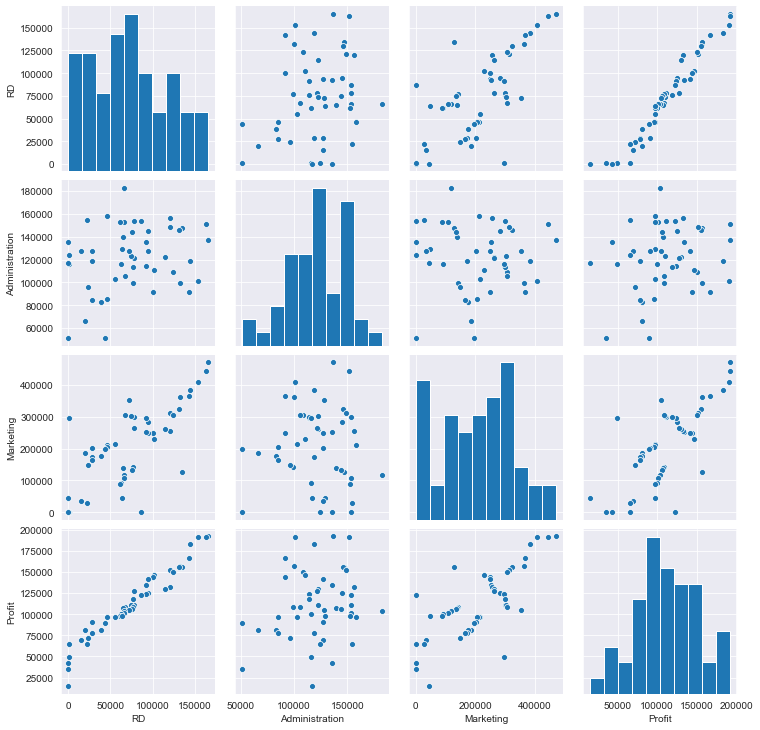

In [8]:
#scatter plot between variables along with histograms
sns.set_style(style='darkgrid')
sns.pairplot(startup_data)

In [9]:
model=smf.ols('Profit~Marketing+Administration+RD',data=startup_data).fit()

In [10]:
model.params

Intercept         50122.192990
Marketing             0.027228
Administration       -0.026816
RD                    0.805715
dtype: float64

In [11]:
print(model.tvalues,'\n',model.pvalues)

Intercept          7.626218
Marketing          1.655077
Administration    -0.525507
RD                17.846374
dtype: float64 
 Intercept         1.057379e-09
Marketing         1.047168e-01
Administration    6.017551e-01
RD                2.634968e-22
dtype: float64


In [12]:
print(model.rsquared,'\n',model.rsquared_adj)

0.9507459940683246 
 0.9475337762901719


In [13]:
#Calculating VIF

In [14]:
rsq_RD=smf.ols('RD~Marketing+Administration',data=startup_data).fit().rsquared 
vif_RD=1/(1-rsq_RD)

rsq_Administration=smf.ols('Administration~Marketing+RD',data=startup_data).fit().rsquared 
vif_Administration=1/(1-rsq_Administration)

rsq_Marketing=smf.ols('Marketing~RD+Administration',data=startup_data).fit().rsquared 
vif_Marketing=1/(1-rsq_Marketing)


In [15]:
d1={'Variables':['RD','Marketing','Administration'],'VIF':[vif_RD,vif_Administration,vif_Administration]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,RD,2.468903
1,Marketing,1.175091
2,Administration,1.175091


In [16]:
#Residual analysis

<function matplotlib.pyplot.show(*args, **kw)>

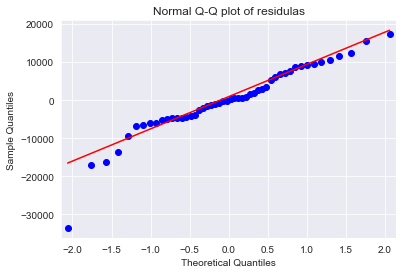

In [17]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residulas")
plt.show

In [33]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [19]:
def get_standardized_values (vals):
    return(vals-vals.mean())/vals.std()


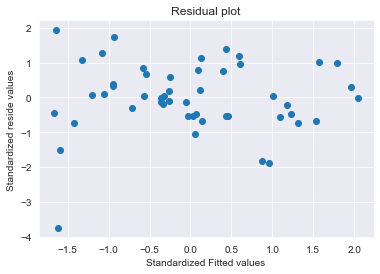

In [20]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title ('Residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized reside values')
plt.show()

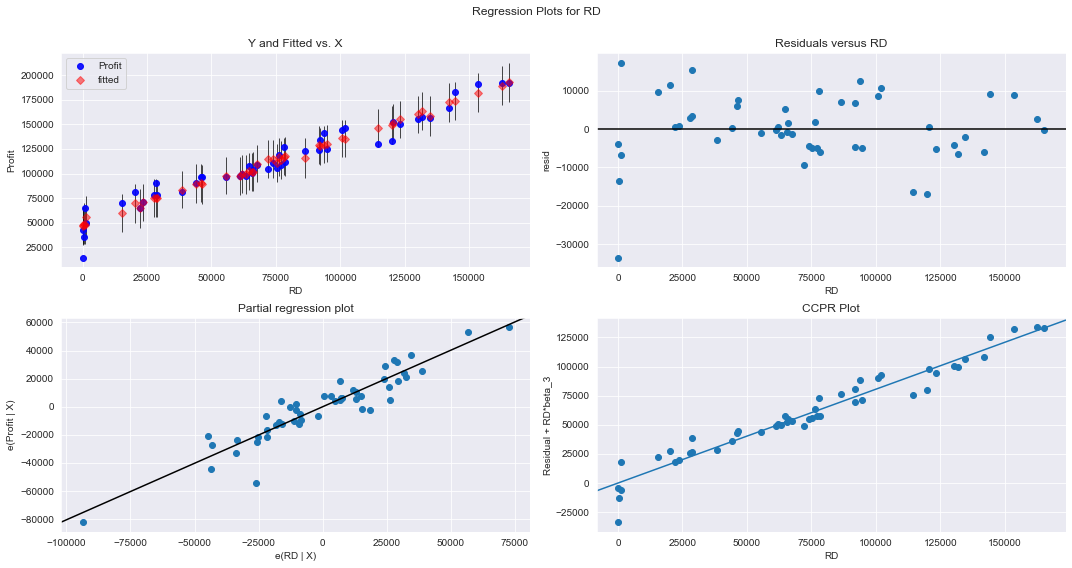

In [21]:
# Residuals vs regressors
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"RD",fig=fig)
plt.show()

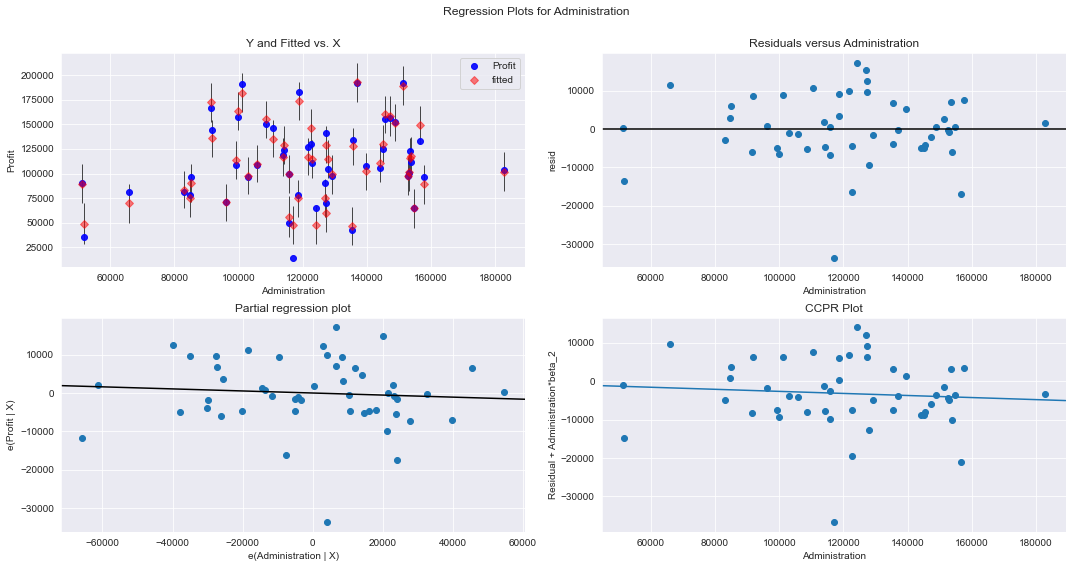

In [22]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show()

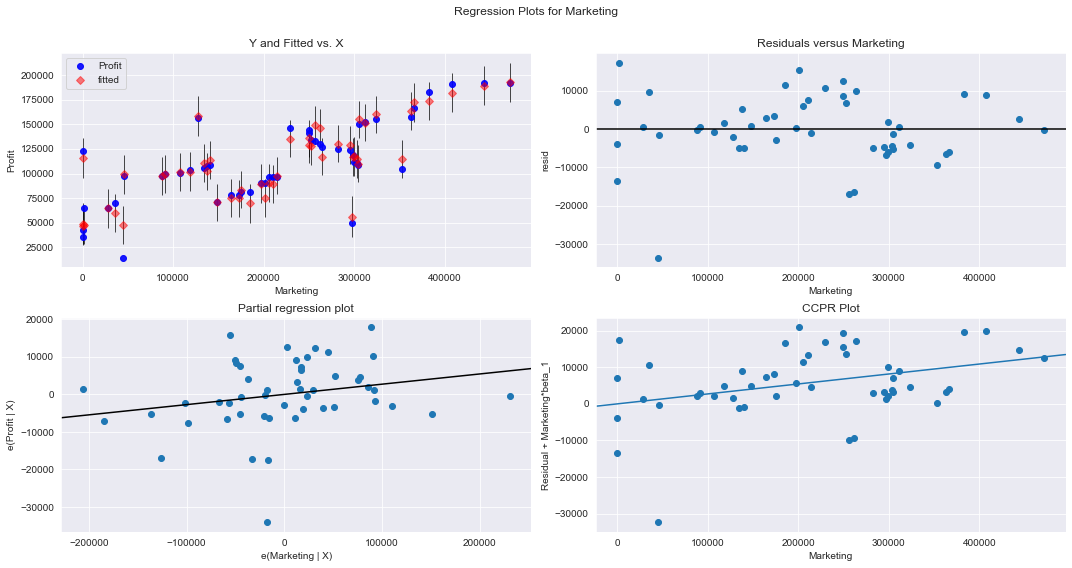

In [23]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Marketing",fig=fig)
plt.show()

In [24]:
#Model deletion diagnostics
#Detecting influencer/outliers
#Cooks distance
model_influence=model.get_influence()
(c, _)=model_influence.cooks_distance

In [25]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<ipython-input-26-6fa07baeb2af>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startup_data)),np.round(c,3))


Text(0, 0.5, 'Cooks distance')

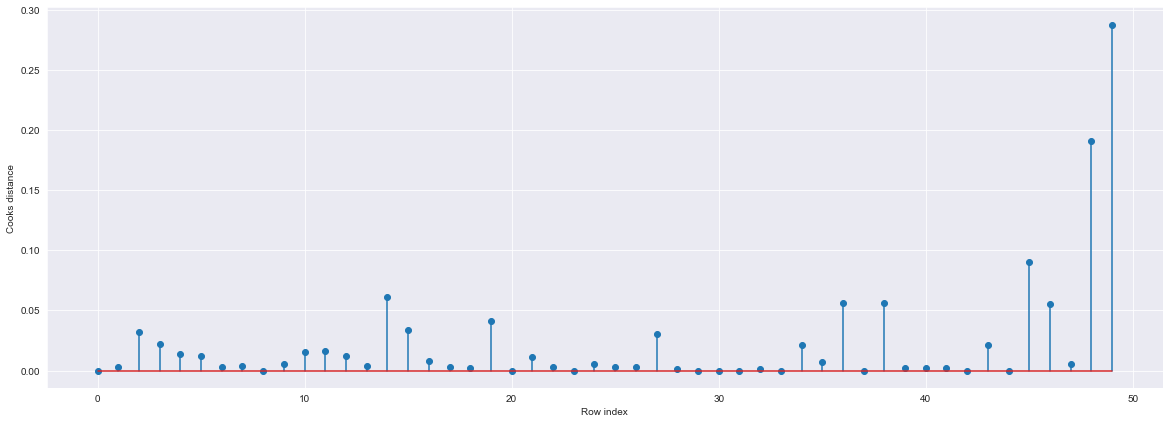

In [26]:
#plot influencer values by using steam plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup_data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')

In [27]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543262)

In [28]:
#High influence points

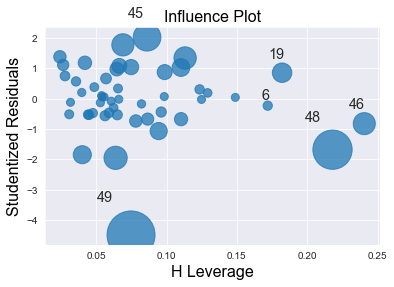

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [30]:
k=startup_data.shape[1]
n=startup_data.shape[0]
levarage_cutoff=3*((k+1)/n)

In [31]:
levarage_cutoff

0.36

In [ ]:
# Since Leverage is 0.36, all the data points are within the range and R sqaure also  0.95. This is the best Model to predict profit.